1. Upload dan load dataset

In [15]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [31]:
df = pd.read_csv("/content/customer_support_tickets.csv")
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


2. Preprocessing & encoding

In [18]:
print(df.columns)
print(df.head(3))

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')
   Ticket ID        Customer Name              Customer Email  Customer Age  \
0          1        Marisa Obrien  carrollallison@example.com            32   
1          2         Jessica Rios    clarkeashley@example.com            42   
2          3  Christopher Robbins   gonzalestracy@example.com            48   

  Customer Gender Product Purchased Date of Purchase      Ticket Type  \
0           Other        GoPro Hero       2021-03-22  Technical issue   
1          Female       LG Smart TV       2021-05-22  Technical issue   
2           Other          Dell XPS       2020-07-14  Technical issue   

 

In [20]:
texts = df['Ticket Description'].astype(str)
labels = df['Ticket Type']

3. Label encoding

In [21]:
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

4. Tokenisasi teks

In [32]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=50, padding='post')

5. Split Data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    padded, labels_encoded, test_size=0.2, random_state=42
)

6. Buat Model LSTM

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 64, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(le.classes_), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

7. Training

In [25]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 18s 59ms/step - accuracy: 0.1918 - loss: 1.6109 - val_accuracy: 0.2078 - val_loss: 1.6096
Epoch 2/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.2140 - loss: 1.6080 - val_accuracy: 0.2037 - val_loss: 1.6108
Epoch 3/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.2179 - loss: 1.6057 - val_accuracy: 0.2066 - val_loss: 1.6118
Epoch 4/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.2240 - loss: 1.6028 - val_accuracy: 0.1989 - val_loss: 1.6309
Epoch 5/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.2641 - loss: 1.5672 - val_accuracy: 0.1942 - val_loss: 1.6699
Epoch 6/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.3169 - loss: 1.5109 - val_accuracy: 0.1860 - val_loss: 1.7063
Epoch 7/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.3680 - loss: 1.4009 - val_accuracy: 0.1877 - val_loss: 1.7734
Epoch 8/10
212/212 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.4073 - loss: 1.3141 - 

8. Evaluasi Model

In [26]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.2f}")

53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1871 - loss: 1.9975
Test Accuracy: 0.19


9. Visualisasi

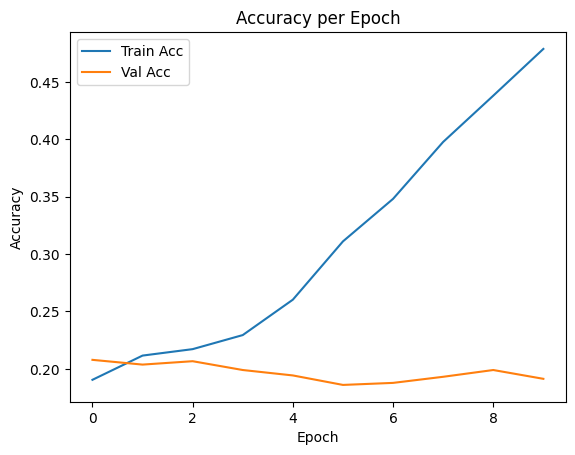

In [27]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

10. Fungsi Prediksi

In [28]:
def predict_ticket(text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=50, padding='post')
    pred = model.predict(pad)
    return le.inverse_transform([np.argmax(pred)])[0]

# Contoh:
predict_ticket("Saya tidak bisa login ke akun saya")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


'Product inquiry'

In [29]:
predict_ticket("Saya ingin mengembalikan barang yang salah")
predict_ticket("Tagihan saya tidak sesuai")
predict_ticket("Kapan produk saya dikirim?")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


'Cancellation request'

11. Akurasi model

In [30]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
                      precision    recall  f1-score   support

     Billing inquiry       0.15      0.02      0.03       357
Cancellation request       0.18      0.25      0.21       327
     Product inquiry       0.20      0.13      0.15       316
      Refund request       0.18      0.11      0.14       345
     Technical issue       0.20      0.45      0.28       349

            accuracy                           0.19      1694
           macro avg       0.18      0.19      0.16      1694
        weighted avg       0.18      0.19      0.16      1694

